In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import sys
import os
import glob
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.feature_selection import RFE
from src import plotting

In [7]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_feature_selection/rfecv'
proc = GatherFeatureDatasets(is_p=False)

In [3]:
# Subset of features I used in RFECV
sr_nonlin_feature_subset = np.array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
                    'amp_1', 'amp_2', 'amp_3', 'amp_4','amp_5', 'signal_dominant_frequency',
                    'signal_dominant_amplitude',
                    'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
                    'noise_variance', 'source_depth_km',
                    'source_receiver_distance_logkm',
                    'source_receiver_back_azimuth_deg'])

# Get Feature names

I don't think how I set up getting the features names is the best way, but it works for now. Should have saved somewhere or something? No guarantee that the feature order wasn't changed at some point but just going to assume that it wasn't.

In [4]:
# from src.processing import SFeatures
# data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
# train = pd.read_csv(f'{data_dir}/s.train.csv')
# test = pd.read_csv(f'{data_dir}/s.test.csv')
# _, _, feature_names = proc.process_station_datasets('YNR',
#                                                     train,
#                                                     test,
#                                                     scaler=False,
#                                                     linear_model=False,
#                                                     source_dist_type='dist')
# feature_names_new = SFeatures.make_feature_names(18,
#                                                  linear_model=False)
# assert np.array_equal(feature_names, feature_names_new), 'New method features do not match the original'

In [5]:
# All the feature names
feature_names = proc.get_feature_names(18, 'dist', False)

# Make sure the feature names match the correct columns
sr_feature_names = proc.get_feature_subset_correct_order(feature_names, sr_nonlin_feature_subset)
sr_feature_names

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5',
       'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_deg'], dtype='<U32')

In [6]:
sr_feature_plot_names = proc.get_feature_plot_names(18, 'dist')[np.where(np.isin(feature_names, sr_feature_names))]
sr_feature_plot_names

array(['ratio 1', 'ratio 2', 'ratio 3', 'ratio 4', 'amp. 1', 'amp. 2',
       'amp. 3', 'amp. 4', 'amp. 5', 'sig. dom. freq.', 'sig. dom. amp.',
       'noise max. amp.', 'sig. max. amp.', 'sig. var.', 'noise var.',
       'depth', 'distance', 'back az.'], dtype='<U15')

# Load the results dictionary json file from RFECV

In [9]:
with open(os.path.join(datadir, 'all.SVR.sr.json')) as fp:
    results_dict = json.load(fp)

# Plot the CV results

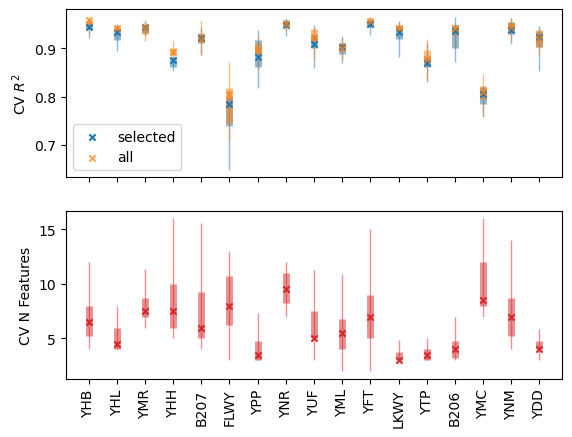

In [10]:
plotting.plot_nested_rfecv_boxplots(results_dict)

# Look into how often features were selected

In [11]:
# Count how many times each feature was selected over RFECV
important_feats_df_dict = {}
for i, key in enumerate(results_dict):
    results = results_dict[key]
    feat_usage_df = RFE.count_feature_usage(np.array(results['optfts_bool']), sr_feature_names)
    important_feats_df_dict[key] = feat_usage_df[['Feature', 'cvcnt']].set_index('Feature')

In [12]:
# Combine the counts from each station
mega_df = None
for key in important_feats_df_dict.keys():
    key_dict = important_feats_df_dict[key].rename(columns={'cvcnt': key})
    if mega_df is None:
        mega_df = key_dict
    else:
        mega_df = mega_df.merge(key_dict, on='Feature')
mega_df = mega_df.loc[sr_feature_names][mega_df.columns.sort_values()]

In [13]:
mega_df

,B206,B207,FLWY,LKWY,YDD,YFT,YHB,YHH,YHL,YMC,YML,YMR,YNM,YNR,YPP,YTP,YUF
Feature,,,,,,,,,,,,,,,,,
amp_ratio_1,1,5,5,1,2,2,0,2,0,3,1,1,2,1,1,0,1
amp_ratio_2,2,2,4,0,2,1,0,2,0,3,2,2,2,0,1,0,3
amp_ratio_3,0,3,2,0,1,0,0,1,1,3,1,0,2,0,1,0,2
amp_ratio_4,1,2,2,0,0,1,0,3,0,3,1,1,4,3,2,0,2
amp_1,6,1,10,7,10,9,10,10,10,10,6,10,5,10,10,10,8
amp_2,6,10,7,3,10,5,10,7,8,10,7,10,10,8,5,2,9
amp_3,3,10,8,6,3,9,10,9,7,10,6,8,9,10,1,3,10
amp_4,3,2,3,2,3,4,4,5,5,8,5,10,9,9,1,2,7
amp_5,6,5,2,2,2,9,6,7,3,7,3,5,4,10,2,0,4


In [14]:
# Get the average number of times a feature was selected as important across all stations
mega_df_avg = mega_df.T.mean().round()
mega_df_avg 

Feature
amp_ratio_1                          2.0
amp_ratio_2                          2.0
amp_ratio_3                          1.0
amp_ratio_4                          1.0
amp_1                                8.0
amp_2                                7.0
amp_3                                7.0
amp_4                                5.0
amp_5                                5.0
signal_dominant_frequency            2.0
signal_dominant_amplitude            2.0
noise_max_amplitude                  1.0
signal_max_amplitude                 1.0
signal_variance                      2.0
noise_variance                       3.0
source_depth_km                      5.0
source_receiver_distance_logkm      10.0
source_receiver_back_azimuth_deg     3.0
dtype: float64

In [15]:
# Count how many times a feature was selected as important across all stations
mega_df.T.sum().round()

Feature
amp_ratio_1                          28
amp_ratio_2                          26
amp_ratio_3                          17
amp_ratio_4                          25
amp_1                               142
amp_2                               127
amp_3                               122
amp_4                                82
amp_5                                77
signal_dominant_frequency            30
signal_dominant_amplitude            27
noise_max_amplitude                  23
signal_max_amplitude                 20
signal_variance                      42
noise_variance                       58
source_depth_km                      81
source_receiver_distance_logkm      168
source_receiver_back_azimuth_deg     53
dtype: int64

In [16]:
# Count how many stations a feature was selected >= 5 times
(mega_df >= 5).T.sum()

Feature
amp_ratio_1                          2
amp_ratio_2                          0
amp_ratio_3                          0
amp_ratio_4                          0
amp_1                               16
amp_2                               15
amp_3                               13
amp_4                                8
amp_5                                8
signal_dominant_frequency            2
signal_dominant_amplitude            0
noise_max_amplitude                  0
signal_max_amplitude                 0
signal_variance                      4
noise_variance                       5
source_depth_km                      7
source_receiver_distance_logkm      17
source_receiver_back_azimuth_deg     4
dtype: int64

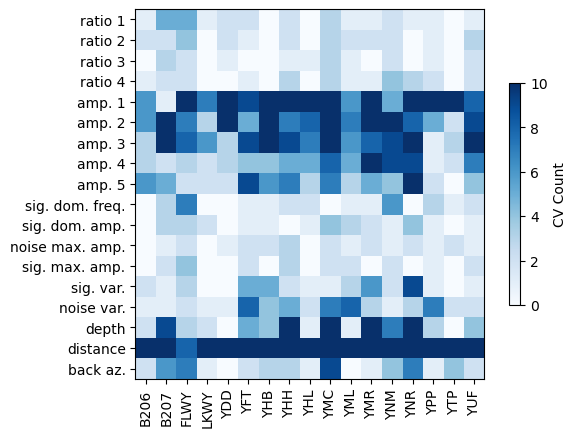

In [17]:
plotting.plot_rfecv_feature_heatmap(mega_df, sr_feature_plot_names)

Amp 1-3, Signal Variance, Noise Variance, Distance, Back Azimuth, Depth